In [1]:
import pandas as pd
import numpy as np 
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [2]:
df_initial = pd.read_csv('v1.0.3/occupations_en.csv')
df_initial.head()

,conceptType,conceptUri,iscoGroup,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,regulatedProfessionNote,scopeNote,definition,inScheme,description
0,Occupation,http://data.europa.eu/esco/occupation/00030d09...,2166,technical director,technical and operations director\nhead of tec...,NaN,released,2016-07-05T13:58:41Z,http://data.europa.eu/esco/regulated-professio...,NaN,NaN,http://data.europa.eu/esco/concept-scheme/occu...,Technical directors realise the artistic visio...
1,Occupation,http://data.europa.eu/esco/occupation/000e93a3...,8121,metal drawing machine operator,metal drawing machine technician\nmetal drawin...,NaN,released,2016-07-05T17:09:43Z,http://data.europa.eu/esco/regulated-professio...,NaN,NaN,http://data.europa.eu/esco/concept-scheme/memb...,Metal drawing machine operators set up and ope...
2,Occupation,http://data.europa.eu/esco/occupation/0019b951...,7543,precision device inspector,inspector of precision instruments\nprecision ...,NaN,released,2016-07-06T09:21:20Z,http://data.europa.eu/esco/regulated-professio...,NaN,NaN,http://data.europa.eu/esco/concept-scheme/occu...,Precision device inspectors make sure precisio...
3,Occupation,http://data.europa.eu/esco/occupation/0022f466...,3155,air traffic safety technician,air traffic safety electronics hardware specia...,NaN,released,2017-01-17T11:40:37Z,http://data.europa.eu/esco/regulated-professio...,NaN,NaN,http://data.europa.eu/esco/concept-scheme/memb...,Air traffic safety technicians provide technic...
4,Occupation,http://data.europa.eu/esco/occupation/002da35b...,2431,hospitality revenue manager,hospitality revenues manager\nyield manager\nh...,NaN,released,2017-01-17T13:33:42Z,http://data.europa.eu/esco/regulated-professio...,NaN,NaN,http://data.europa.eu/esco/concept-scheme/memb...,Hospitality revenue managers maximise revenue ...


In [3]:
df_initial.sort_values('preferredLabel', inplace=True)
df_initial.head()

,conceptType,conceptUri,iscoGroup,preferredLabel,altLabels,hiddenLabels,status,modifiedDate,regulatedProfessionNote,scopeNote,definition,inScheme,description
992,Occupation,http://data.europa.eu/esco/occupation/52df9d56...,2166,3D animator,3D animators\ncomputer-generated imagery anima...,NaN,released,2017-01-17T13:41:16Z,http://data.europa.eu/esco/regulated-professio...,Excludes people performing managerial activities.,NaN,http://data.europa.eu/esco/concept-scheme/occu...,3D animators are in charge of animating 3D mod...
2203,Occupation,http://data.europa.eu/esco/occupation/bab5fa79...,2166,3D modeller,3D modellers\n3D texturing artist\nCGI modelle...,NaN,released,2017-02-02T13:26:10Z,http://data.europa.eu/esco/regulated-professio...,Excludes people performing managerial activities.,NaN,http://data.europa.eu/esco/concept-scheme/memb...,"3D modellers design 3D models of objects, virt..."
918,Occupation,http://data.europa.eu/esco/occupation/4cf7be91...,3118,3D printing technician,3D printing operator\nprinting machine technic...,NaN,released,2017-01-17T12:33:31Z,http://data.europa.eu/esco/regulated-professio...,NaN,NaN,http://data.europa.eu/esco/concept-scheme/occu...,3D Printing technicians assist in the designin...
859,Occupation,http://data.europa.eu/esco/occupation/490d0c6f...,7421,ATM repair technician,automated teller machine repair technician\nAT...,NaN,released,2016-07-05T17:10:54Z,http://data.europa.eu/esco/regulated-professio...,NaN,NaN,http://data.europa.eu/esco/concept-scheme/occu...,"ATM repair technicians install, diagnose, main..."
1678,Occupation,http://data.europa.eu/esco/occupation/8befd482...,2342,Freinet school teacher,Freinet school teaching practitioner\nFreinet ...,NaN,released,2016-12-22T21:32:18Z,http://data.europa.eu/esco/regulated-professio...,Includes people working in institutions at oth...,NaN,http://data.europa.eu/esco/concept-scheme/occu...,Freinet school teachers educate students using...


In [4]:
df_initial.shape

(2942, 13)

In [5]:
df_extract = df_initial[['preferredLabel', 'description']].copy()
df_extract.insert(0, 'occupation_ID', range(0, 0+len(df_extract)))
df_extract.head()

,occupation_ID,preferredLabel,description
992,0,3D animator,3D animators are in charge of animating 3D mod...
2203,1,3D modeller,"3D modellers design 3D models of objects, virt..."
918,2,3D printing technician,3D Printing technicians assist in the designin...
859,3,ATM repair technician,"ATM repair technicians install, diagnose, main..."
1678,4,Freinet school teacher,Freinet school teachers educate students using...


In [6]:
df_extract.shape

(2942, 3)

In [7]:
import re
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

def cleaner(rows):
    word_lst = []
    description = rows['description']
    description = description.lower()
    description = re.sub(r'[?|!|\'|"|#]',r'', description)
    description = re.sub(r'[.|,|)|(|\|/]',r' ', description)
    words = [lemmatiser.lemmatize(word) for word in description.split() if word not in stop]
    [word_lst.append(word) for word in words if word not in word_lst]
    return word_lst

In [8]:
df_extract['mid_description'] = df_extract.apply(cleaner, axis=1)
df_extract.head()

,occupation_ID,preferredLabel,description,mid_description
992,0,3D animator,3D animators are in charge of animating 3D mod...,"[3d, animator, charge, animating, model, objec..."
2203,1,3D modeller,"3D modellers design 3D models of objects, virt...","[3d, modeller, design, model, object, virtual,..."
918,2,3D printing technician,3D Printing technicians assist in the designin...,"[3d, printing, technician, assist, designing, ..."
859,3,ATM repair technician,"ATM repair technicians install, diagnose, main...","[atm, repair, technician, install, diagnose, m..."
1678,4,Freinet school teacher,Freinet school teachers educate students using...,"[freinet, school, teacher, educate, student, u..."


In [9]:
df_extract['mid_description'][992]

['3d',
 'animator',
 'charge',
 'animating',
 'model',
 'object',
 'virtual',
 'environment',
 'layout',
 'character',
 'animated',
 'agent']

In [10]:
df_extract['description'][992]

'3D animators are in charge of animating 3D models of objects, virtual environments, layouts, characters and 3D virtual animated agents.'

In [11]:
# join words together
def join_word(rows):
    word_lst = rows['mid_description']
    joined_words = ( " ".join(word_lst))
    return joined_words

In [12]:
joined_word = df_extract.apply(join_word, axis=1)

In [13]:
df_extract['cleaned description'] = joined_word
df_extract

,occupation_ID,preferredLabel,description,mid_description,cleaned description
992,0,3D animator,3D animators are in charge of animating 3D mod...,"[3d, animator, charge, animating, model, objec...",3d animator charge animating model object virt...
2203,1,3D modeller,"3D modellers design 3D models of objects, virt...","[3d, modeller, design, model, object, virtual,...",3d modeller design model object virtual enviro...
918,2,3D printing technician,3D Printing technicians assist in the designin...,"[3d, printing, technician, assist, designing, ...",3d printing technician assist designing progra...
859,3,ATM repair technician,"ATM repair technicians install, diagnose, main...","[atm, repair, technician, install, diagnose, m...",atm repair technician install diagnose maintai...
1678,4,Freinet school teacher,Freinet school teachers educate students using...,"[freinet, school, teacher, educate, student, u...",freinet school teacher educate student using a...
...,...,...,...,...,...
1490,2937,zoo educator,Zoo educators teach visitors about the animals...,"[zoo, educator, teach, visitor, animal, living...",zoo educator teach visitor animal living aquar...
2682,2938,zoo registrar,Zoo registrars are responsible for the mainten...,"[zoo, registrar, responsible, maintenance, wid...",zoo registrar responsible maintenance wide var...
1179,2939,zoo section leader,Zoo section leaders are responsible for managi...,"[zoo, section, leader, responsible, managing, ...",zoo section leader responsible managing leadin...
2835,2940,zookeeper,Zookeepers manage animals that are kept in cap...,"[zookeepers, manage, animal, kept, captivity, ...",zookeepers manage animal kept captivity conser...


In [14]:
df_extract['description'][992]

'3D animators are in charge of animating 3D models of objects, virtual environments, layouts, characters and 3D virtual animated agents.'

In [15]:
df_extract['mid_description'][992]

['3d',
 'animator',
 'charge',
 'animating',
 'model',
 'object',
 'virtual',
 'environment',
 'layout',
 'character',
 'animated',
 'agent']

In [16]:
df_extract['cleaned description'][992]

'3d animator charge animating model object virtual environment layout character animated agent'

In [18]:
#Most commonly occuring raw_extract skill description
most_common_raw = pd.Series(' '.join(df_extract['description']).split()).value_counts()[:100]
most_common_raw

and           9507
the           5834
of            3783
to            3065
They          3053
              ... 
who            135
field          135
services       130
clients        126
coordinate     124
Length: 100, dtype: int64

In [20]:
#Most commonly occuring cleaned skill description
most_common_cleaned = pd.Series(' '.join(df_extract['cleaned description']).split()).value_counts()[:100]
most_common_cleaned

also         501
equipment    466
ensure       453
work         397
perform      388
            ... 
related      108
metal        108
task         107
improve      106
apply        104
Length: 100, dtype: int64

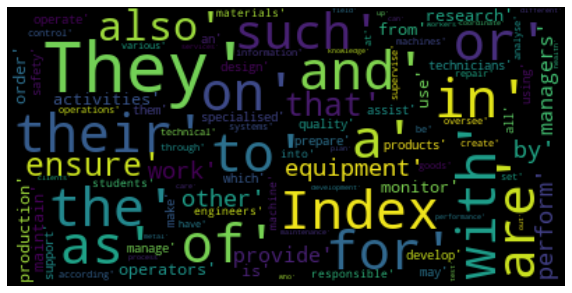

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(max_words=100, max_font_size=50).generate(str(most_common_raw.index))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

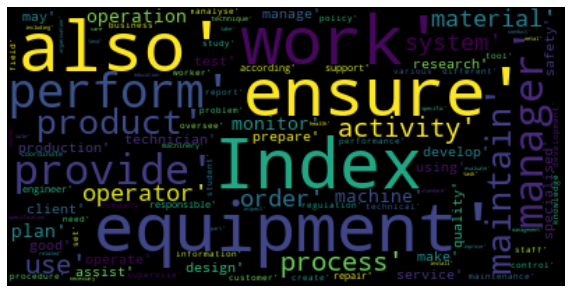

In [22]:
# Commonly occuring words after cleaning
wc = WordCloud(max_words=100, max_font_size=50).generate(str(most_common_cleaned.index))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

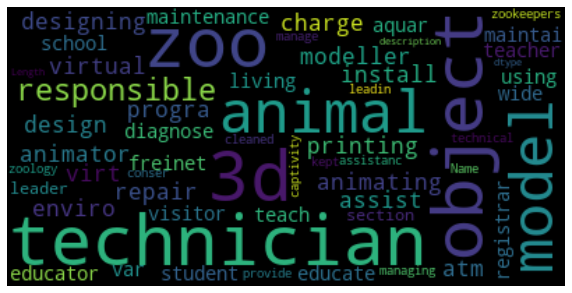

In [23]:
# Words in skill description after cleaning
wc = WordCloud(max_words=100, max_font_size=50).generate(str(df_extract['cleaned description']))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()